# **Customer Churn Prediction**
## Using Classification Models

---

## **1. Introduction**

The goal of this project is to uncover the factors that drive customer churn, while identifying actionable insights to reduce churn and increase customer loyalty. By understanding these factors, we aim to develop predictive models to help prevent churn and make data-driven decisions to retain more of the customer base in the future.

---

## **2. Data Exploration**

This part involves summarizing categorical and continuous features to identify key trends. Additionally, visualizing the data distributions provided valuable insights for understanding the underlying patterns and relationships within the dataset.

---

**Please explore the metadata file to gain further insights into the dataset and its features before proceeding!**

In [4]:
#Import essentials Librairies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [5]:
# Read the data file
df = pd.read_excel('churn_data.xlsx', sheet_name='Databel')

# Print the first 5 rows of the dataset
df.head()

,Customer_ID,Churn_Label,Account_length_in_months,Local_Calls,Local_Mins,Intl_Calls,Intl_Mins,Intl_Active,Intl_Plan,Extra_International_Charges,...,Senior,Group,Number_of_Customers_in_Group,Device_Protection_&_Online_Backup,Contract_Type,Payment_Method,Monthly_Charge,Total_Charges,Churn_Category,Churn_Reason
0,4444-BZPU,No,1,3,8.0,0.0,0.0,No,no,0.0,...,No,No,0,No,Month-to-Month,Direct Debit,10,10,NaN,NaN
1,5676-PTZX,No,33,179,431.3,0.0,0.0,No,no,0.0,...,No,No,0,Yes,One Year,Paper Check,21,703,NaN,NaN
2,8532-ZEKQ,No,44,82,217.6,0.0,0.0,No,yes,0.0,...,No,No,0,Yes,One Year,Direct Debit,23,1014,NaN,NaN
3,1314-SMPJ,No,10,47,111.6,60.0,71.0,Yes,yes,0.0,...,No,No,0,No,Month-to-Month,Paper Check,17,177,NaN,NaN
4,2956-TXCJ,No,62,184,621.2,310.0,694.4,Yes,yes,0.0,...,No,No,0,No,One Year,Direct Debit,28,1720,NaN,NaN


In [6]:
# Get info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6687 entries, 0 to 6686
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer_ID                        6687 non-null   object 
 1   Churn_Label                        6687 non-null   object 
 2   Account_length_in_months           6687 non-null   int64  
 3   Local_Calls                        6687 non-null   int64  
 4   Local_Mins                         6687 non-null   float64
 5   Intl_Calls                         6687 non-null   float64
 6   Intl_Mins                          6687 non-null   float64
 7   Intl_Active                        6687 non-null   object 
 8   Intl_Plan                          6687 non-null   object 
 9   Extra_International_Charges        6687 non-null   float64
 10  Customer_Service_Calls             6687 non-null   int64  
 11  Avg_Monthly_GB_Download            6687 non-null   int64

---

We are working with a dataset of ***6,687 entries***, which includes ***29 features*** encompassing both numerical and categorical data. These features offer deep insights into customer behavior, with key variables such as ***age***, ***region***, ***contract type***, and ***churn reasons***. Additionally, we have granular details on ***customer service calls***, ***data plans***, and additional charges.

---

In [8]:
# Identify columns with 'Yes' or 'No' values
yes_no_columns = []
for col in df.columns:
  unique_values = df[col].unique()
  if set(['Yes', 'No']).issubset(unique_values):
    yes_no_columns.append(col)

# Convert 'Yes' and 'No' to boolean values
for col in yes_no_columns:
  df[col] = df[col].map({'Yes': True, 'No': False})

# Change all columns with booleans to 0 and 1
df = df.replace({True: 1, False: 0})

# Verify changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6687 entries, 0 to 6686
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer_ID                        6687 non-null   object 
 1   Churn_Label                        6687 non-null   int64  
 2   Account_length_in_months           6687 non-null   int64  
 3   Local_Calls                        6687 non-null   int64  
 4   Local_Mins                         6687 non-null   float64
 5   Intl_Calls                         6687 non-null   float64
 6   Intl_Mins                          6687 non-null   float64
 7   Intl_Active                        6687 non-null   int64  
 8   Intl_Plan                          6687 non-null   object 
 9   Extra_International_Charges        6687 non-null   float64
 10  Customer_Service_Calls             6687 non-null   int64  
 11  Avg_Monthly_GB_Download            6687 non-null   int64

In [9]:
# Process to descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Churn_Label,6687.0,0.268581,0.443254,0.0,0.0,0.0,1.00,1.0
Account_length_in_months,6687.0,32.337820,24.595689,1.0,9.0,29.0,55.00,77.0
Local_Calls,6687.0,130.974129,121.893966,1.0,31.0,98.0,199.00,918.0
Local_Mins,6687.0,322.752864,288.619931,4.0,76.9,250.5,498.05,1234.2
Intl_Calls,6687.0,51.097524,103.592369,0.0,0.0,0.0,52.00,1120.0
Intl_Mins,6687.0,130.070624,243.527828,0.0,0.0,0.0,140.40,1372.5
Intl_Active,6687.0,0.384477,0.486508,0.0,0.0,0.0,1.00,1.0
Extra_International_Charges,6687.0,33.641783,76.346828,0.0,0.0,0.0,16.40,585.8
Customer_Service_Calls,6687.0,0.915657,1.411484,0.0,0.0,0.0,2.00,5.0
Avg_Monthly_GB_Download,6687.0,6.696276,7.454339,0.0,1.0,5.0,9.00,43.0


## **3. Data Cleaning**

This part involves addressing missing and duplicate values by imputation.

---

In [11]:
# Check if our dataset contains any null values
null_values = df.isnull().sum()
print(null_values)

Customer_ID                             0
Churn_Label                             0
Account_length_in_months                0
Local_Calls                             0
Local_Mins                              0
Intl_Calls                              0
Intl_Mins                               0
Intl_Active                             0
Intl_Plan                               0
Extra_International_Charges             0
Customer_Service_Calls                  0
Avg_Monthly_GB_Download                 0
Unlimited_Data_Plan                     0
Extra_Data_Charges                      0
State                                   0
Phone_Number                            0
Gender                                  0
Age                                     0
Under_30                                0
Senior                                  0
Group                                   0
Number_of_Customers_in_Group            0
Device_Protection_&_Online_Backup       0
Contract_Type                     

In [12]:
# Check if our dataset contains any duplicated values
duplicated_values = df.duplicated().sum()
print("The number of duplicated values are : ", duplicated_values)

The number of duplicated values are :  0


---

We have found ***no duplicate entries*** ; however, it is important to highlight that the ***Churn Category*** and ***Churn Reason*** contain some missing data. This absence of information constitutes a significant portion of the data pertaining to individuals who are not classified as churners, which is understandable.

---

## **4. Exploratory Data Analysis**

This part involves delving deeper into the cleaned data to uncover hidden patterns, relationships, and insights using combined visualizations.

---

In [15]:
# Explore 'Churn_Label'
print(df['Churn_Label'].value_counts())

Churn_Label
0    4891
1    1796
Name: count, dtype: int64


In [16]:
# Calculate churn statistics
print(f"Number of Customers: {df['Customer_ID'].nunique()}")
print(f"Number of Churned Customers: {df['Churn_Label'].value_counts()[1]}")

# Calculate the percentage of churners
churn_percentage = (df['Churn_Label'].sum() / len(df['Churn_Label'])) * 100
print(f"Percentage of churners: {churn_percentage:.2f}%")

Number of Customers: 6687
Number of Churned Customers: 1796
Percentage of churners: 26.86%


---

From a quick analysis, we’ve observed that ***26.86 %*** of the customer base has churned. This represents a significant proportion, and it’s essential that we explore the underlying factors contributing to this churn.

---

In [18]:
# Calculate total charges for churners
churners_total_charges = df[df['Churn_Label'] == 1]['Total_Charges'].sum()

# Calculate total charges for all customers
total_charges_all_customers = df['Total_Charges'].sum()

# Print the results
print(f"Total charges for churners: {churners_total_charges}")
print(f"Total charges for all customers: {total_charges_all_customers}")

# Compare the total charges
print(f"Churners contribute {churners_total_charges / total_charges_all_customers * 100:.2f}% of total charges.")

Total charges for churners: 1367515
Total charges for all customers: 7247074
Churners contribute 18.87% of total charges.


---

We’ve observed that churners contribute with ***18.87 %*** of total charges.

This may indicates that while these customers are no longer active, they have still contributed a significant portion of the overall revenue.

---

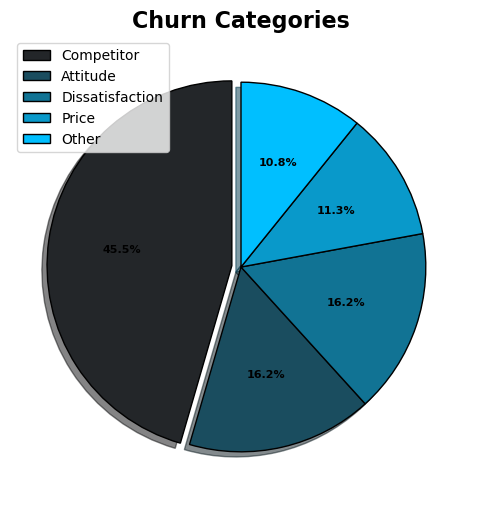

In [20]:
# Explore 'Churn_Category'
# Create the figure for the plot
plt.figure(figsize=(8, 6))

# Generate a color palette
palette = sns.dark_palette("deepskyblue", 5)

# Get the value counts for the churn category
values = df['Churn_Category'].value_counts()

# Dynamically create the explode list based on the number of unique values in 'Churn_Category'
explode = [0.05] + [0] * (len(values) - 1)

plt.pie(values, autopct='%1.1f%%', startangle=90,
        colors=palette, explode=explode, shadow=True, radius=1,
        textprops={"fontsize": 8, "fontweight":'bold'},
        wedgeprops={"linewidth": 1, "edgecolor": 'black'}, rotatelabels=False)

plt.legend(labels=values.index, loc='best')
plt.title('Churn Categories', fontsize=16, fontweight='bold')

# Show the plot
plt.show()

# # Save the plot to a file
# plt.savefig('churn_categories_pie_chart.png')

---

The pie chart showcases the primary reasons behind customer churn, with ***competitor-related*** factors emerging as the most significant (45.5%).

Additionally, ***attitude*** and ***dissatisfaction*** are responsible for 16.2% of churn cases.

---

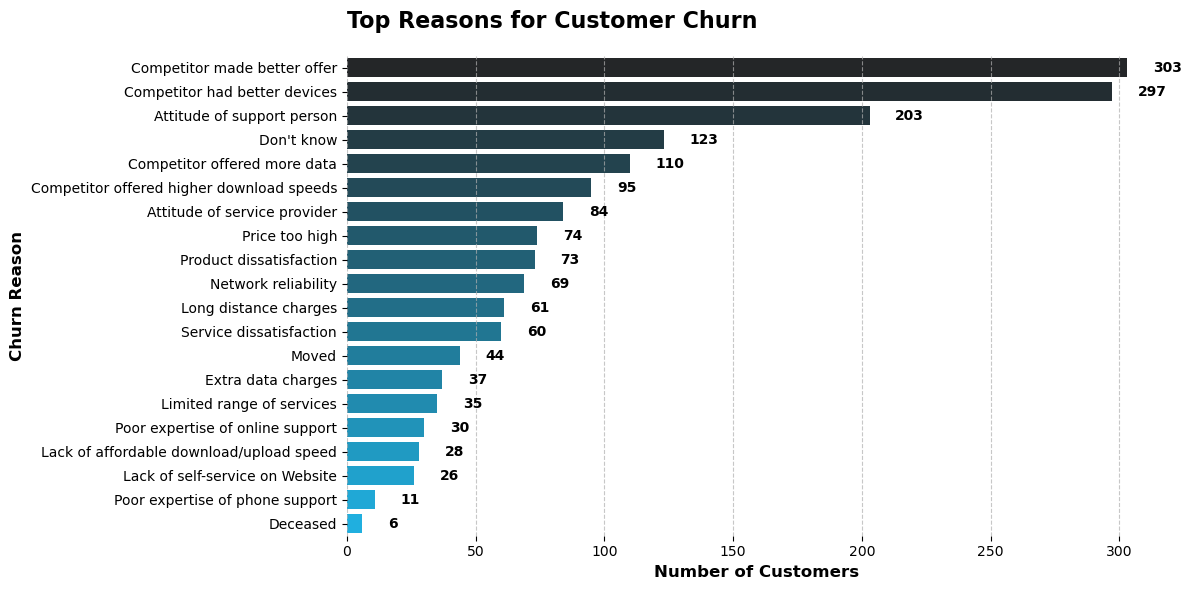

In [22]:
# Explore 'Churn_Reason'
# Calculate the value counts for 'Churn_Reason'
churn_reason_counts = df['Churn_Reason'].value_counts()

# Create the figure for the plot
plt.figure(figsize=(12, 6))

# Generate a color palette
palette = sns.dark_palette("deepskyblue", 20)

# Create a horizontal bar plot
sns.barplot(x=churn_reason_counts.values,
            y=churn_reason_counts.index,
            palette=palette)

# Add a title and labels
plt.title('Top Reasons for Customer Churn', fontweight='bold', fontsize=16, pad=20, loc='left')
plt.xlabel('Number of Customers', fontweight='bold', fontsize=12)
plt.ylabel('Churn Reason', fontweight='bold', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Annotate the bars with the actual churn reason count
for index, value in enumerate(churn_reason_counts.values):
    plt.text(value + 10, index, f'{value}', fontweight='bold', color='black', va='center')

sns.despine(left=True, bottom=True)

# Adjust layout and Show the plot
plt.tight_layout()
plt.show()

# # Save the plot to a file
# plt.savefig('top_reasons_for_customer_churn.png')

---

The 3 top reasons of customers churn are :
- ***Competitor made better offer***
- ***Competitor has better devices***
- ***Attitude of support person***

---

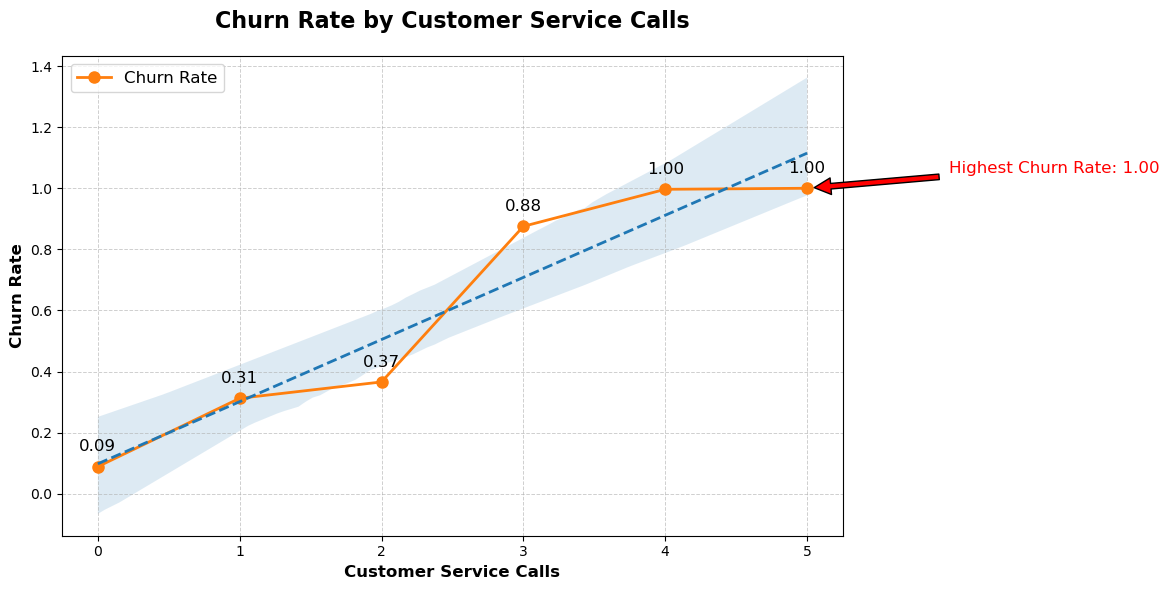

In [24]:
# Group data by 'Customer_Service_Calls' and calculate the churn rate
churn_rate_by_calls = df.groupby('Customer_Service_Calls')['Churn_Label'].mean()

# Create the figure for the plot  
plt.figure(figsize=(12, 6))

# Plot the churn rate by calls
plt.plot(churn_rate_by_calls.index, churn_rate_by_calls.values, marker='o', linestyle='-',
         markersize=8, color='#ff7f0e', linewidth=2, label='Churn Rate')

# Add a regression line
sns.regplot(x=churn_rate_by_calls.index, y=churn_rate_by_calls.values, scatter=False,
            color='#1f77b4', line_kws={"linewidth": 2, "linestyle": "--"})

# Customize labels and title
plt.xlabel('Customer Service Calls', fontsize=12, fontweight='bold')
plt.ylabel('Churn Rate', fontsize=12, fontweight='bold')
plt.title('Churn Rate by Customer Service Calls', fontsize=16, fontweight='bold', pad=20)
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.6)

# Add annotations to highlight important points
for i, value in enumerate(churn_rate_by_calls.values):
    plt.text(churn_rate_by_calls.index[i], value + 0.05, f"{value:.2f}", ha='center', fontsize=12, color='black')

# Highlight sudden spikes in churn rate with markers or annotations
max_churn_index = churn_rate_by_calls.idxmax()
max_churn_value = churn_rate_by_calls.max()
plt.annotate(f'Highest Churn Rate: {max_churn_value:.2f}', xy=(max_churn_index, max_churn_value),
             xytext=(max_churn_index+1, max_churn_value+0.05),
             arrowprops=dict(facecolor='red', shrink=0.05), fontsize=12, color='red')

# Add a legend
plt.legend(loc='upper left', fontsize=12)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# # Save the plot to a file
# plt.savefig('churn_rate_by_customer_service_calls.png')

---

The chart highlights a **strong positive correlation** between the number of customer service calls and the churn rate, indicating that customers who frequently seek support are more likely to churn.

---

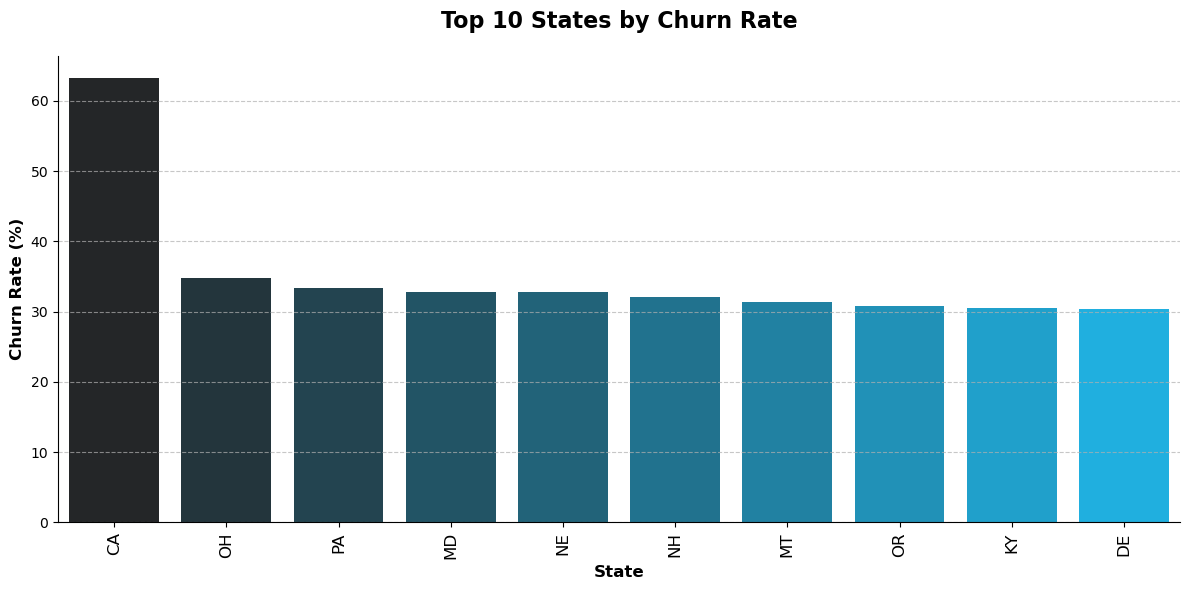

In [26]:
# Calculate the churn rate by state
churn_by_state = df.groupby('State')['Churn_Label'].mean() * 100

# Sort values and select the top 10 states with the highest churn rate
top_10_states = churn_by_state.sort_values(ascending=False).head(10)

# Create the figure for the plot
plt.figure(figsize=(12, 6))

# Generate a color palette
palette = sns.dark_palette("deepskyblue", 10)

# Plot the churn rate by state
sns.barplot(x=top_10_states.index,
            y=top_10_states.values,
            palette=palette)

# Add title and labels
plt.title('Top 10 States by Churn Rate', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('State', fontsize=12, fontweight='bold')
plt.ylabel('Churn Rate (%)', fontsize=12, fontweight='bold')
plt.xticks(rotation=90, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()

# # Save the plot to a file
# plt.savefig('top_10_states_by_churn_rate.png')

---

This bar chart highlights the top 10 states with the highest churn rates, with ***California*** standing out as the leader, significantly surpassing other states.

Additionally, most of the states with elevated churn rates are concentrated in the ***Eastern U.S.***, pointing to potential regional trends.

---

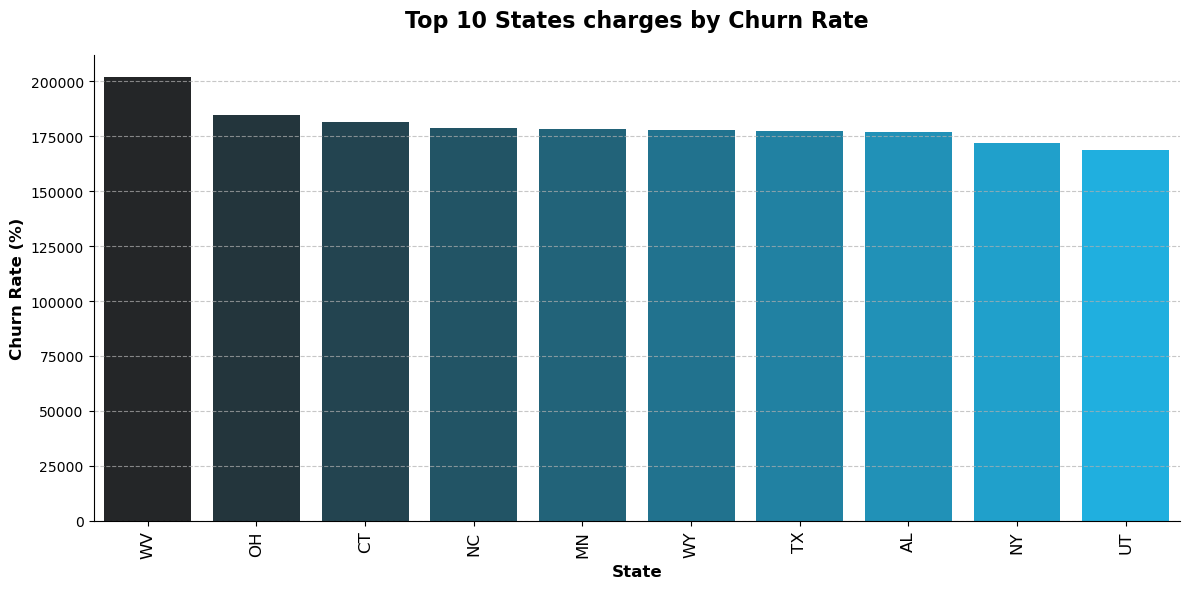

In [28]:
# Calculate the churn rate by state
total_charges_by_state = df.groupby('State')['Total_Charges'].sum()

# Sort values and select the top 10 states with the highest churn rate
largest_10_states_charges = total_charges_by_state.sort_values(ascending=False).head(10)

# Create the figure for the plot
plt.figure(figsize=(12, 6))

# Generate a color palette
palette = sns.dark_palette("deepskyblue", 10)

# Plot the total charges by state
sns.barplot(x=largest_10_states_charges.index,
            y=largest_10_states_charges.values,
            palette=palette)

# Add title and labels
plt.title('Top 10 States charges by Churn Rate', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('State', fontsize=12, fontweight='bold')
plt.ylabel('Churn Rate (%)', fontsize=12, fontweight='bold')
plt.xticks(rotation=90, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()

# # Save the plot to a file
# plt.savefig('top_10_states_charges_by_churn_rate.png')

---

This bar chart showcases the top 10 states with the highest charges and churn rates. Interestingly, ***California is neither first nor on the list***, indicating that high churn in this region may not be driven by pricing factors.

Most states with elevated charges and churn rates are concentrated in the ***Eastern U.S.***, suggesting potential regional patterns


---

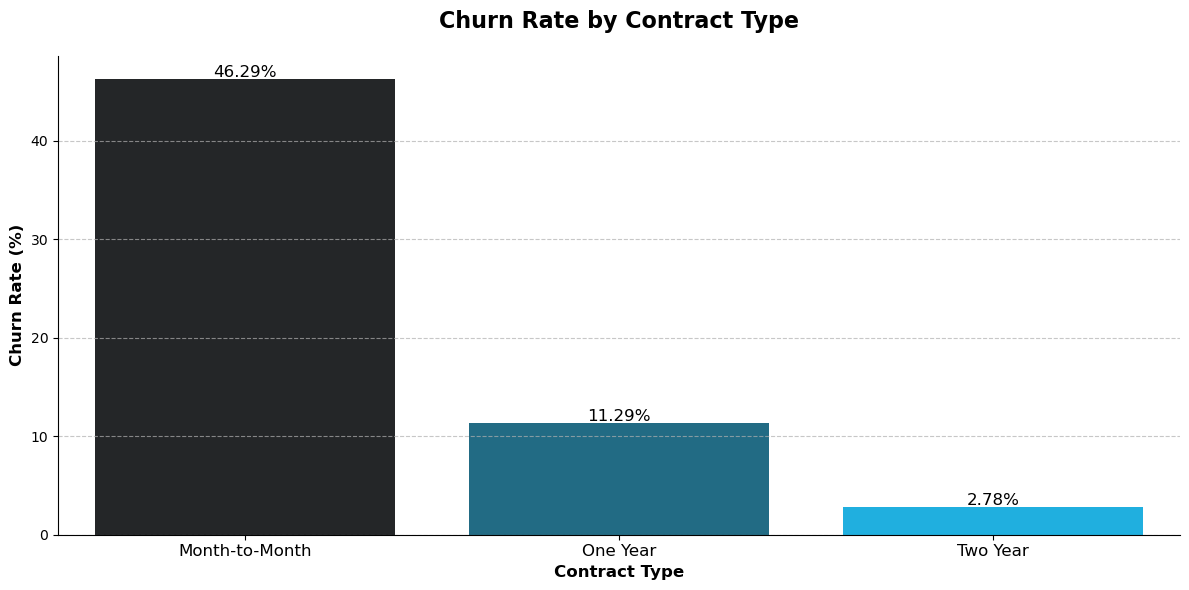

In [30]:
# Calculate the churn rate by contract type
churn_by_contract = df.groupby('Contract_Type')['Churn_Label'].mean() * 100

# Sort values by the highest churn rate
sorted_churn_by_contract = churn_by_contract.sort_values(ascending=False)

# Create the figure for the plot
plt.figure(figsize=(12, 6))

# Generate a color palette
palette = sns.dark_palette("deepskyblue", 3)

# Plot the churn by contract
sns.barplot(x=sorted_churn_by_contract.index, y=sorted_churn_by_contract.values, palette=palette)

# Add title and labels
plt.title('Churn Rate by Contract Type', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Contract Type', fontsize=12, fontweight='bold')
plt.ylabel('Churn Rate (%)', fontsize=12, fontweight='bold')
plt.xticks(fontsize=12)

# Annotate the bars with churn rate values
for index, value in enumerate(sorted_churn_by_contract.values):
    plt.text(index, value + 0.2, f'{value:.2f}%', ha='center', fontsize=12, color='black')

plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# # Save the plot to a file
# plt.savefig('churn_rate_by_contract_type.png')


---

**Contract type** plays a major role in churn rates, with ***Month-to-Month*** customers experiencing the highest churn, followed by ***One-Year*** customers, while ***Two-Year*** customers have the lowest churn rates.

---

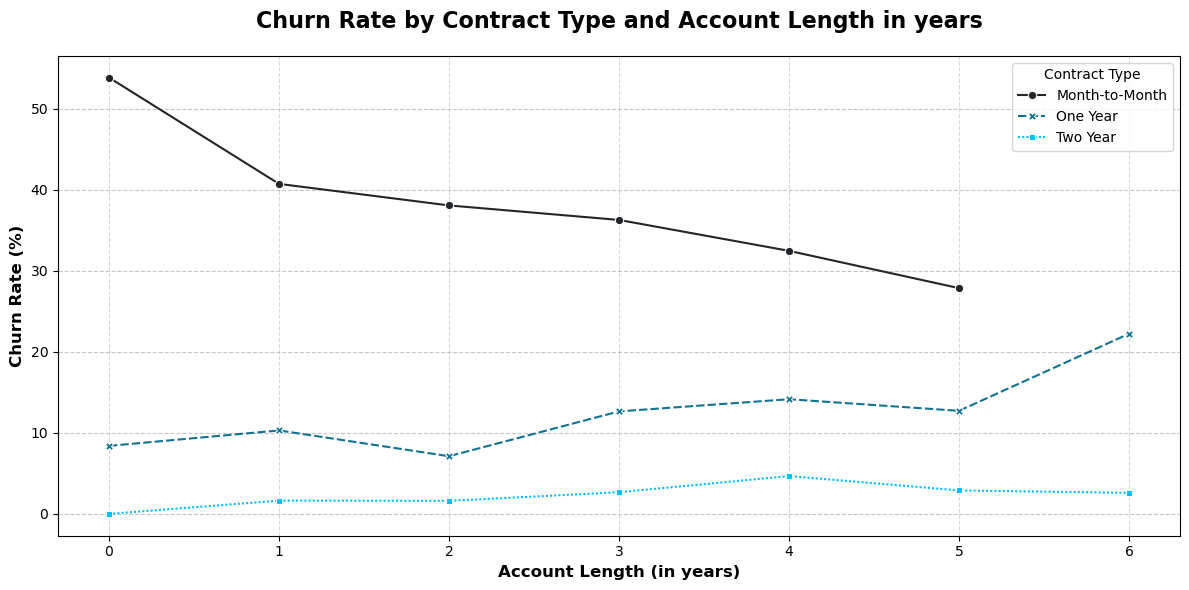

In [32]:
# Group Account_in_lenghts by leaps of 12
df['Account_Length'] = pd.cut(df['Account_length_in_months'], bins=range(0, df['Account_length_in_months'].max() + 12, 12), labels=False)

# Calculate the churn rate by contract type and Account_Length_Group
churn_by_contract_and_length = df.groupby(['Contract_Type', 'Account_Length'])['Churn_Label'].mean() * 100

# Reshape the data for visualization
churn_by_contract_and_length = churn_by_contract_and_length.reset_index()

# Create the figure for the plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Account_Length', y='Churn_Label', hue='Contract_Type', style='Contract_Type', data=churn_by_contract_and_length, markers=True, palette=palette)

# Add title and labels
plt.title('Churn Rate by Contract Type and Account Length in years', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Account Length (in years)', fontsize=12, fontweight='bold')
plt.ylabel('Churn Rate (%)', fontsize=12, fontweight='bold')
plt.legend(title='Contract Type', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Improve the plot aesthetics with a lighter background grid
plt.gca().xaxis.grid(color='gray', linestyle='--', alpha=0.3)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# # Save the plot to a file
# plt.savefig('churn_rate_by_contract_type_and_account_length.png')

---

As ***account length*** increases, churn rates tend to decrease across all contract types, indicating that customer loyalty strengthens over time.

***Two-Year contracts*** are especially effective in minimizing churn, even in the early stages of the contract, showing significantly lower churn rates.

---

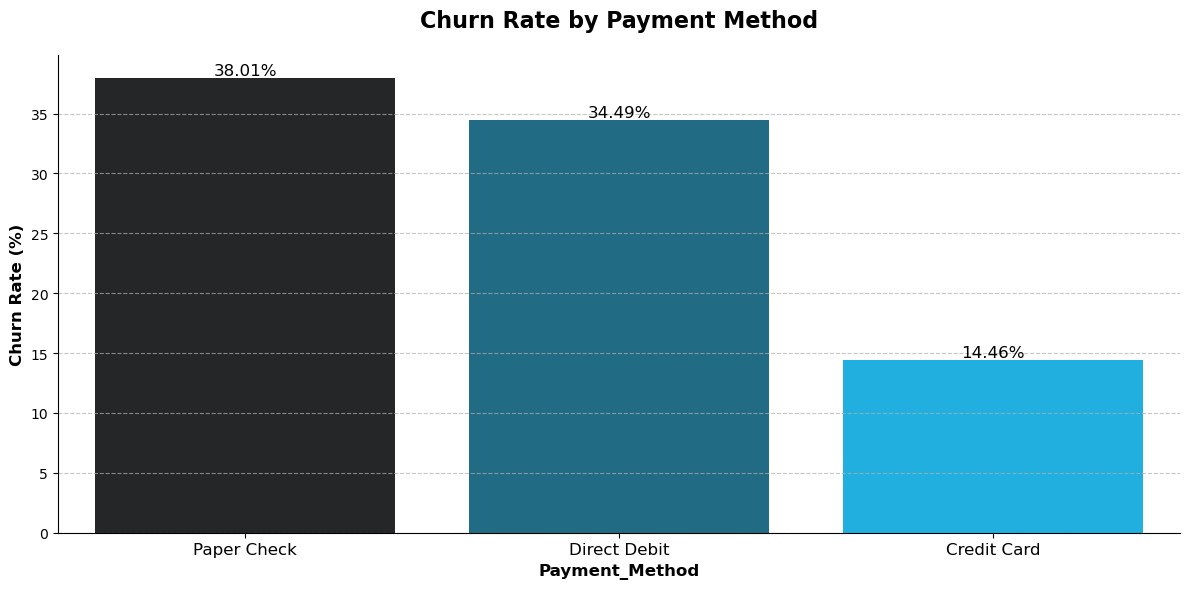

In [34]:
# Calculate the churn rate by payment method
churn_by_payment = df.groupby('Payment_Method')['Churn_Label'].mean() * 100

# Sort values by the highest churn rate
sorted_churn_by_payment = churn_by_payment.sort_values(ascending=False)

# Create the figure for the plot
plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_churn_by_payment.index, y=sorted_churn_by_payment.values, palette=palette)

# Add title and labels
plt.title('Churn Rate by Payment Method', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Payment_Method', fontsize=12, fontweight='bold')
plt.ylabel('Churn Rate (%)', fontsize=12, fontweight='bold')
plt.xticks(fontsize=12)

# Annotate the bars with churn rate values
for index, value in enumerate(sorted_churn_by_payment.values):
    plt.text(index, value + 0.2, f'{value:.2f}%', ha='center', fontsize=12, color='black')

plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# # Save the plot to a file
# plt.savefig('churn_rate_by_payment_method.png')

---

The bar chart highlights critical insights into the effects of payment methods on churn rates.

Customers who choose ***Paper Check*** as their payment method demonstrate the highest churn rate at 38.01%.

Additionally, ***Direct Debit*** is also a notable factor in customer churn.


On the other hand, ***Credit Card***  payments are less likely to have churners.

---

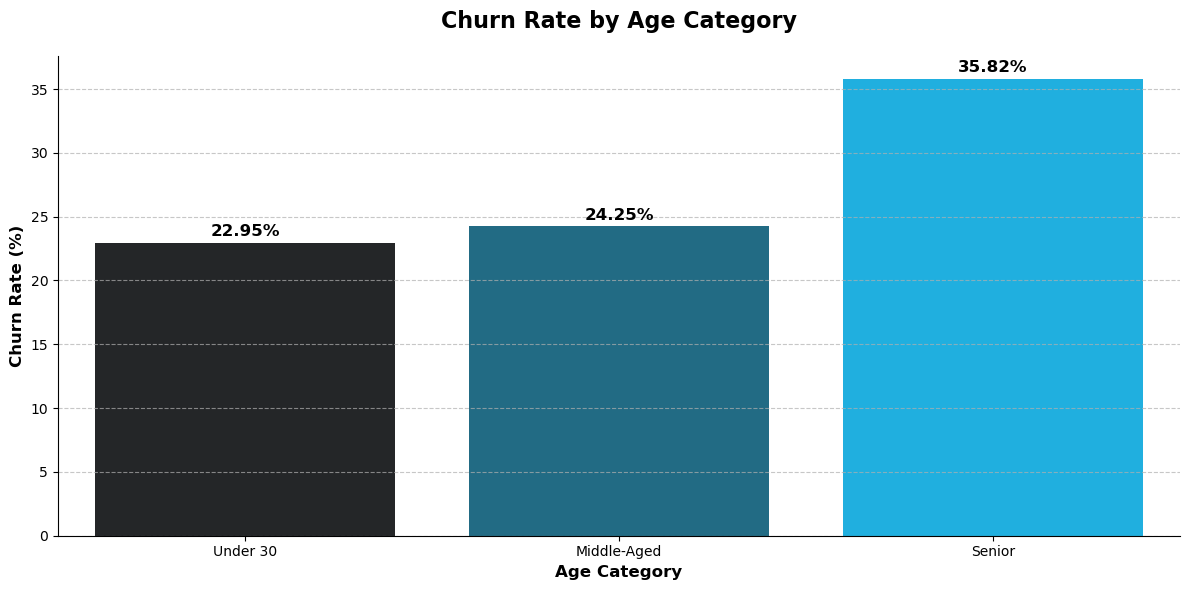

In [36]:
# Create a new column for age categories
df['Age_Category'] = pd.cut(df['Age'], bins=[0, 30, 60, np.inf], labels=['Under 30', 'Middle-Aged', 'Senior'])

# Calculate the churn rate by age category
churn_by_age_category = df.groupby('Age_Category')['Churn_Label'].mean() * 100

# Create the figure for the plot
plt.figure(figsize=(12, 6))
sns.barplot(x=churn_by_age_category.sort_index().index, y=churn_by_age_category.values, palette=palette)

# Add title and labels
plt.title('Churn Rate by Age Category', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Age Category', fontsize=12, fontweight='bold')
plt.ylabel('Churn Rate (%)', fontsize=12, fontweight='bold')

# Annotate the bars with churn rate values
for index, value in enumerate(churn_by_age_category.values):
    plt.text(index, value + 0.5, f'{value:.2f}%', ha='center', fontsize=12, fontweight='bold', color='black')

plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# # Save the plot to a file
# plt.savefig('churn_rate_by_age_category.png')

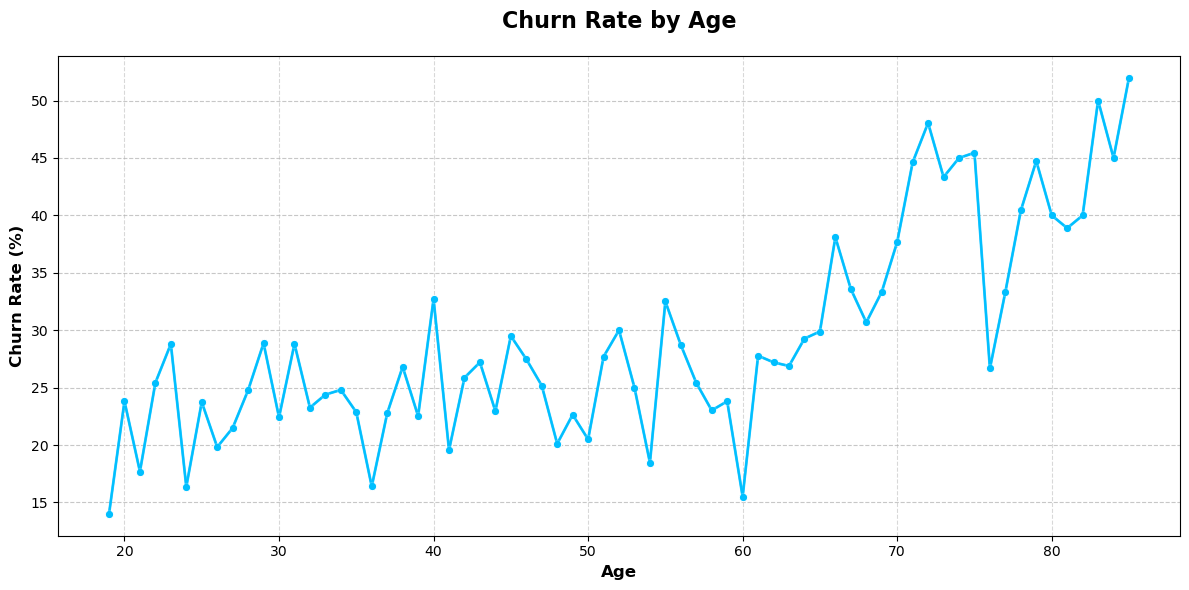

In [37]:
# Calculate the churn rate by age
churn_by_age = df.groupby('Age')['Churn_Label'].mean() * 100

# Create the figure for the plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=churn_by_age.index, y=churn_by_age.values, marker='o', color="deepskyblue")

# Add title and labels
plt.title('Churn Rate by Age', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Age', fontsize=12, fontweight='bold')
plt.ylabel('Churn Rate (%)', fontsize=12, fontweight='bold')

# Add a smoother line
plt.plot(churn_by_age.index, churn_by_age.values, linewidth=2, alpha=0.8, color="deepskyblue")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().xaxis.grid(color='gray', linestyle='--', alpha=0.3)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# # Save the plot to a file
# plt.savefig('churn_rate_by_age.png')

---

We categorized customers into three groups: ***Under 30***, ***Middle-Aged (30-60)***, and ***Senior (60 and older)***.

The charts show that age is a significant factor influencing churn. ***Senior*** customers have the highest churn rate at 35.82%, followed by ***Middle-Aged*** customers at 24.25%.

***Younger*** customers are less likely to churn.

---

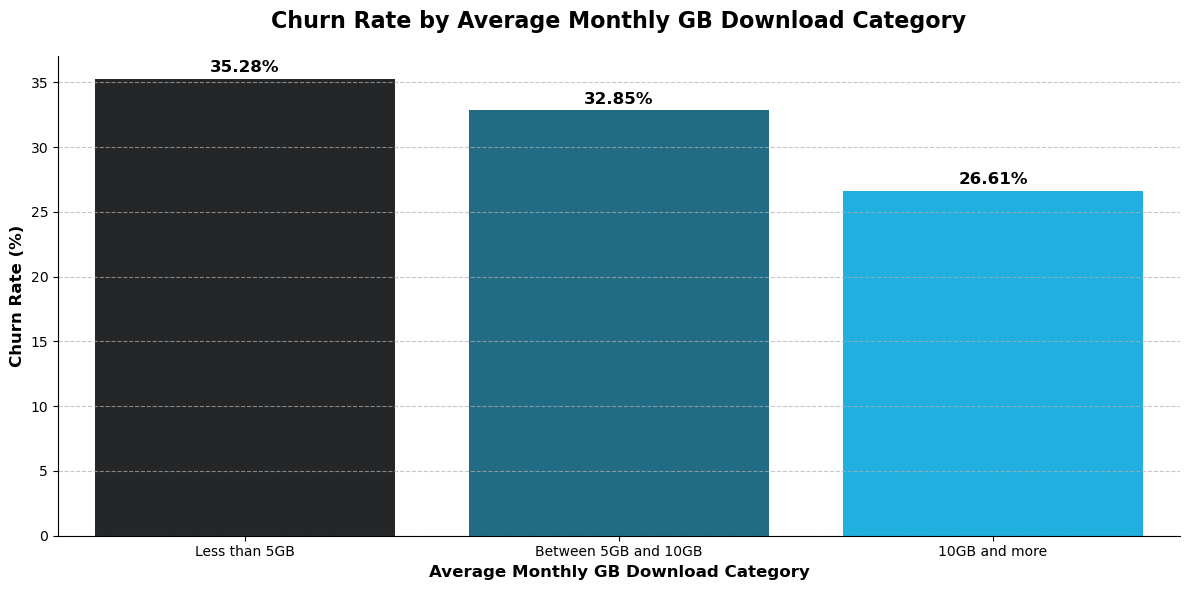

In [39]:
# Create a new column for GB download categories
df['Avg_Monthly_GB_Download_Category'] = pd.cut(df['Avg_Monthly_GB_Download'],
                                                bins=[0, 5, 10, np.inf],
                                                labels=['Less than 5GB', 'Between 5GB and 10GB', '10GB and more'])

# Calculate the churn rate by Avg_Monthly_GB_Download_Category
churn_by_download_category = df.groupby('Avg_Monthly_GB_Download_Category')['Churn_Label'].mean() * 100

# Create the figure for the plot
plt.figure(figsize=(12, 6))
sns.barplot(x=churn_by_download_category.index, y=churn_by_download_category.values, palette=palette)

# Add title and labels
plt.title('Churn Rate by Average Monthly GB Download Category', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Average Monthly GB Download Category', fontsize=12, fontweight='bold')
plt.ylabel('Churn Rate (%)', fontsize=12, fontweight='bold')

# Annotate the bars with churn rate values
for index, value in enumerate(churn_by_download_category.values):
    plt.text(index, value + 0.5, f'{value:.2f}%', ha='center', fontsize=12, fontweight='bold', color='black')

plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# # Save the plot to a file
# plt.savefig('churn_rate_by_download_category.png')

---

We categorized Average Monthly GB Data usage into three groups: ***Less than 5GB***, ***5GB to 10GB***, and ***10GB or more***.

The bar chart shows that customers who use ***less than 5GB*** per month have the highest churn rate at 35.28%. Customers who use ***10GB or more*** per month have the lowest churn rate at 26.61%, making them less likely to churn.

---

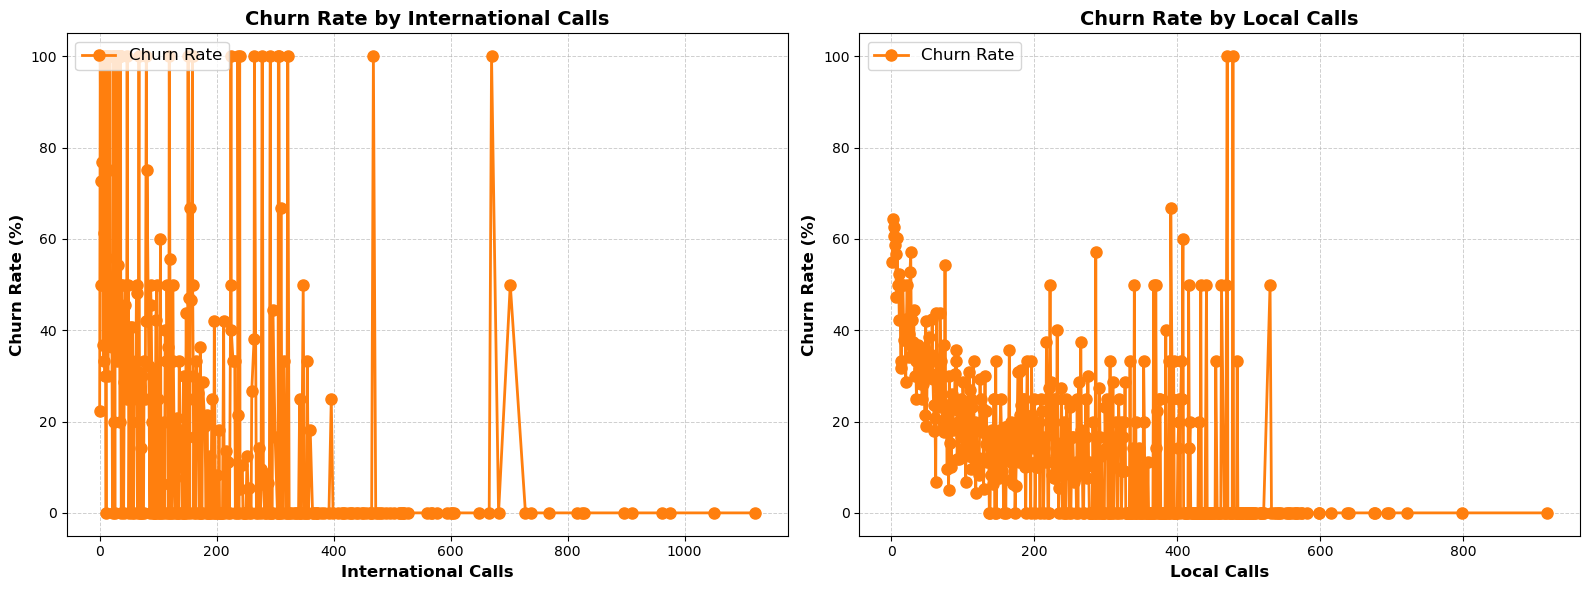

In [41]:
# Group data by 'Intl_Calls' and calculate the churn rate
churn_rate_by_intl_calls = df.groupby('Intl_Calls')['Churn_Label'].mean() * 100

# Group data by 'Local_Calls' and calculate the churn rate
churn_rate_by_local_calls = df.groupby('Local_Calls')['Churn_Label'].mean() * 100

# Create the figure for the plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot churn rate by Intl_Calls
axes[0].plot(churn_rate_by_intl_calls.index, churn_rate_by_intl_calls.values, marker='o', linestyle='-',
             markersize=8, color='#ff7f0e', linewidth=2, label='Churn Rate')
axes[0].set_xlabel('International Calls', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Churn Rate (%)', fontsize=12, fontweight='bold')
axes[0].set_title('Churn Rate by International Calls', fontsize=14, fontweight='bold')
axes[0].grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.6)
axes[0].legend(loc='upper left', fontsize=12)

# Plot churn rate by Local_Calls
axes[1].plot(churn_rate_by_local_calls.index, churn_rate_by_local_calls.values, marker='o', linestyle='-',
             markersize=8, color='#ff7f0e', linewidth=2, label='Churn Rate')
axes[1].set_xlabel('Local Calls', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Churn Rate (%)', fontsize=12, fontweight='bold')
axes[1].set_title('Churn Rate by Local Calls', fontsize=14, fontweight='bold')
axes[1].grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.6)
axes[1].legend(loc='upper left', fontsize=12)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# # Save the plot to a file
# plt.savefig('churn_rate_by_intl_and_local_calls.png')

---

There is a ***slight inverse correlation*** between the number of local calls and churn rate.

This suggests that customers who make more local calls may be less likely to churn.

---

## **5. Feature Engineering**

This part concerns creating new features or transforming existing variables to improve predictive accuracy. Additionally, data was prepared for modeling by scaling numerical features and encoding categorical variables.

---

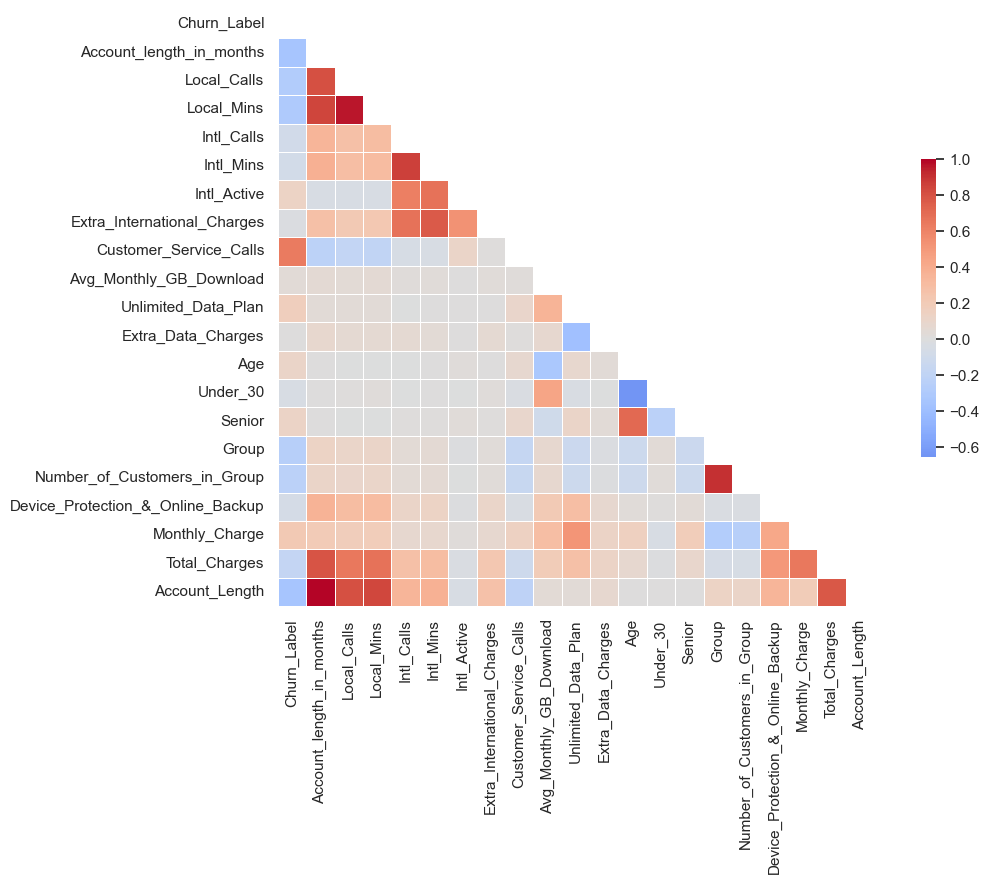

In [44]:
# CORRELATION MATRIX
from string import ascii_letters

sns.set_theme(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Select only numeric columns
numeric_df = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Generate a custom diverging colormap
cmap = sns.color_palette("coolwarm", as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.tight_layout()
plt.show()

# # Save the plot to a file
# plt.savefig('correlation_matrix.png')

---
***Summary***

- Moderate negative correlation between account length and churn
- Moderate negative correlation between unlimited data plans and churn
- Moderate negative correlation between contract type and churn
- Weak positive correlation between total charges and churn
- Weak positive correlation between age and churn
- Moderate positive correlation between customer service calls and churn

None of the features play a huge role on influencing churn Label (the outcome).

---

In [46]:
# Check all the columns
df.columns

Index(['Customer_ID', 'Churn_Label', 'Account_length_in_months', 'Local_Calls',
       'Local_Mins', 'Intl_Calls', 'Intl_Mins', 'Intl_Active', 'Intl_Plan',
       'Extra_International_Charges', 'Customer_Service_Calls',
       'Avg_Monthly_GB_Download', 'Unlimited_Data_Plan', 'Extra_Data_Charges',
       'State', 'Phone_Number', 'Gender', 'Age', 'Under_30', 'Senior', 'Group',
       'Number_of_Customers_in_Group', 'Device_Protection_&_Online_Backup',
       'Contract_Type', 'Payment_Method', 'Monthly_Charge', 'Total_Charges',
       'Churn_Category', 'Churn_Reason', 'Account_Length', 'Age_Category',
       'Avg_Monthly_GB_Download_Category'],
      dtype='object')

In [47]:
# Removing the unecessary features from the dataset and the new columns created on the visualization process
df = df.drop(['Customer_ID', 'Phone_Number','Under_30', 'Senior', 'Churn_Reason', 'Churn_Category',
              'Account_Length', 'Avg_Monthly_GB_Download_Category', 'Age_Category'], axis=1)

# Check results
df.columns

Index(['Churn_Label', 'Account_length_in_months', 'Local_Calls', 'Local_Mins',
       'Intl_Calls', 'Intl_Mins', 'Intl_Active', 'Intl_Plan',
       'Extra_International_Charges', 'Customer_Service_Calls',
       'Avg_Monthly_GB_Download', 'Unlimited_Data_Plan', 'Extra_Data_Charges',
       'State', 'Gender', 'Age', 'Group', 'Number_of_Customers_in_Group',
       'Device_Protection_&_Online_Backup', 'Contract_Type', 'Payment_Method',
       'Monthly_Charge', 'Total_Charges'],
      dtype='object')

In [48]:
# Process label encoding
from sklearn.preprocessing import LabelEncoder
df = df.apply(LabelEncoder().fit_transform)

In [49]:
# Split the data into dependent and independent variables
x = df.drop('Churn_Label', axis = 1)
y = df.Churn_Label

print(x.shape)
print(y.shape)

(6687, 22)
(6687,)


In [50]:
# Making x_train, x_test, y_train, y_test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=42, stratify=y, shuffle=True)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5015, 22)
(5015,)
(1672, 22)
(1672,)


In [51]:
# Process to feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

x_train = pd.DataFrame(x_train)
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-0.581855,-0.060156,0.000253,-0.595874,-0.616892,-0.794289,-0.330557,-0.520294,0.767114,0.748122,...,0.527271,-1.023201,-1.434546,-0.545474,-0.460546,-0.721539,-0.894762,0.569490,1.290318,-0.002570
1,-0.419827,-0.185866,-0.126291,0.726221,0.683868,1.258988,-0.330557,0.865040,0.767114,-0.368162,...,-0.481682,0.975768,0.996063,-0.545474,-0.460546,-0.721539,0.282989,-1.152025,0.001175,-0.271508
2,-1.270474,-1.057459,-1.325741,-0.471148,-0.553129,1.258988,-0.330557,-0.487094,2.181740,-0.228627,...,0.258217,0.975768,-0.367449,-0.545474,-0.460546,-0.721539,-0.894762,0.569490,-0.735478,-1.092474
3,0.673862,-0.546236,-0.331245,-0.595874,-0.616892,-0.794289,-0.330557,-0.520294,0.059801,-0.228627,...,1.132642,-1.023201,-0.604582,-0.545474,-0.460546,1.385926,1.460740,0.569490,1.781420,1.654804
4,0.147271,0.878483,0.873639,1.262543,1.147210,1.258988,-0.330557,1.103474,0.059801,1.166729,...,0.392744,0.975768,0.581081,-0.545474,-0.460546,1.385926,0.282989,-1.152025,-0.735478,-0.257353


## **6. Model Building**

in this part, we build and train classification models for churn prediction. The performance of these models are evaluated using metrics such as accuracy, precision, recall, and F1 score.

---

In [53]:
# Import Differents Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Import Essentials Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, log_loss, cohen_kappa_score
from sklearn.metrics import classification_report

# Import Cross validation
from sklearn.model_selection import cross_val_score

#### **Decision Tree Classifier**

The Accuracy is: 86.48 %


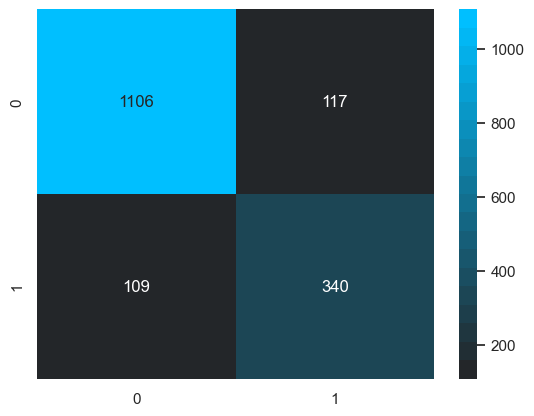

In [55]:
# Build the Model
model_dc = DecisionTreeClassifier()
model_dc.fit(x_train, y_train)
pred_dc = model_dc.predict(x_test)

# Determine the accuracy
accuracy_dc = round(model_dc.score(x_test, y_test) * 100, 2)
print('The Accuracy is: ' +str(accuracy_dc) + ' %')

# Generate a color palette
palette = sns.dark_palette("deepskyblue", 20)

# Plot matrix of confusion
cm_dc = confusion_matrix(y_test, pred_dc)
sns.heatmap(cm_dc, annot=True, fmt='3.0f', cmap=palette)

# Generate the classification metrics
precision_dc = round(precision_score(y_test, pred_dc), 3)
recall_dc = round(recall_score(y_test, pred_dc), 3)
f1_dc = round(f1_score(y_test, pred_dc), 3)

#### **Random Forest Classifier**

The Accuracy is: 90.37 %


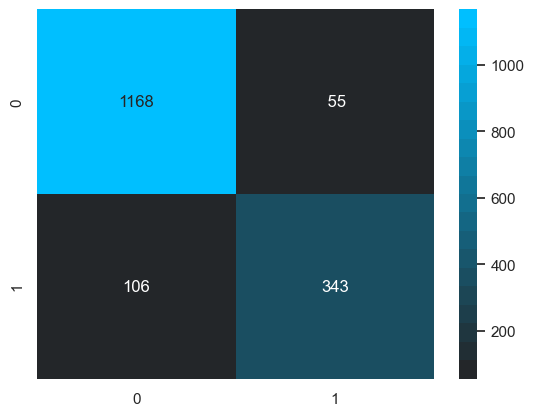

In [57]:
# Build the Model
model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)
pred_rf = model_rf.predict(x_test)

# Determine the accuracy
accuracy_rf = round(model_rf.score(x_test, y_test) * 100, 2)
print('The Accuracy is: ' +str(accuracy_rf) + ' %')

# Plot matrix of confusion
cm_rf = confusion_matrix(y_test, pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='3.0f', cmap=palette)

# Generate the classification metrics
precision_rf = round(precision_score(y_test, pred_rf), 3)
recall_rf = round(recall_score(y_test, pred_rf), 3)
f1_rf = round(f1_score(y_test, pred_rf), 3)

#### **Support Vector Machines (SVM)**

The Accuracy is: 89.83 %


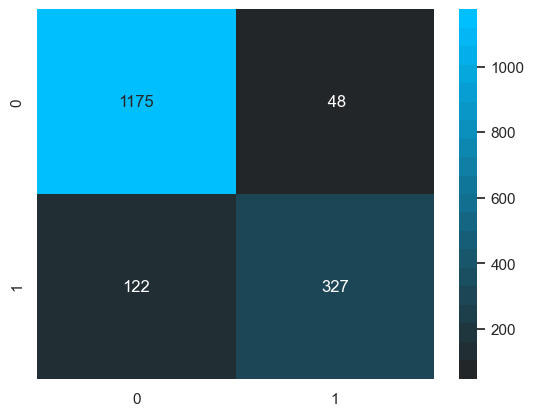

In [59]:
# Build the model
model_svm = SVC(probability=True)
model_svm.fit(x_train,y_train)
pred_svm = model_svm.predict(x_test)

# Determine the accuracy
accuracy_svm = round(model_svm.score(x_test, y_test) * 100, 2)
print('The Accuracy is: ' +str(accuracy_svm) + ' %')

# Plot matrix of confusion
cm_svm  = confusion_matrix(y_test,pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='3.0f', cmap=palette)

# Generate the classification metrics
precision_svm = round(precision_score(y_test, pred_svm), 3)
recall_svm = round(recall_score(y_test, pred_svm), 3)
f1_svm = round(f1_score(y_test, pred_svm), 3)

#### **Naive Bayes**

The Accuracy is: 77.93 %


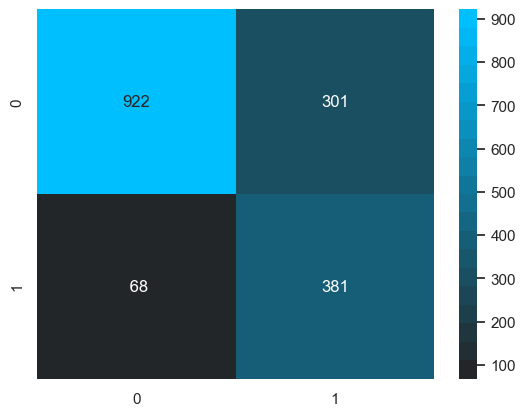

In [61]:
# Build the Model
model_nb = GaussianNB()
model_nb.fit(x_train,y_train)
pred_nb = model_nb.predict(x_test)

# Determine the accuracy
accuracy_nb = round(model_nb.score(x_test, y_test) * 100, 2)
print('The Accuracy is: ' +str(accuracy_nb) + ' %')

# Plot matrix of confusion
cm_nb = confusion_matrix(y_test,pred_nb)
sns.heatmap(cm_nb, annot=True, fmt='3.0f', cmap=palette)

# Generate the classification metrics
precision_nb = round(precision_score(y_test, pred_nb), 3)
recall_nb = round(recall_score(y_test, pred_nb), 3)
f1_nb = round(f1_score(y_test, pred_nb), 3)

#### **KNeighborsClassifier**

The Accuracy is: 87.08 %


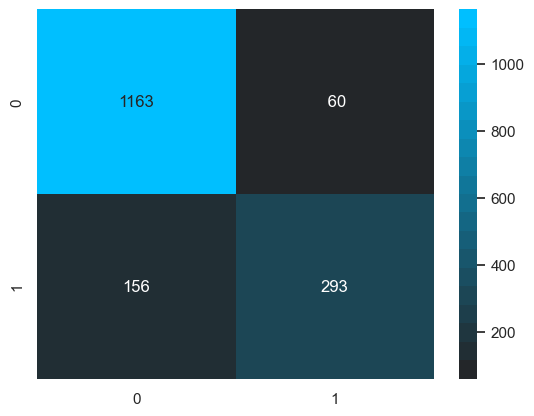

In [63]:
# Build the Model
model_knn = KNeighborsClassifier()
model_knn.fit(x_train,y_train)
pred_knn = model_knn.predict(x_test)

# Determine the accuracy
accuracy_knn = round(model_knn.score(x_test, y_test) * 100, 2)
print('The Accuracy is: ' +str(accuracy_knn) + ' %')

# Plot matrix of confusion
cm_knn = confusion_matrix(y_test,pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='3.0f', cmap=palette)

# Generate the classification metrics
precision_knn = round(precision_score(y_test, pred_knn), 3)
recall_knn = round(recall_score(y_test, pred_knn), 3)
f1_knn = round(f1_score(y_test, pred_knn), 3)

#### **Models Results**

In [65]:
# Process to Cross Validation
cvs_rf = cross_val_score(estimator=model_rf , X = x_train, y = y_train , cv =5)
cvs_dc = cross_val_score(estimator=model_dc , X = x_train, y = y_train , cv =5)
cvs_svm = cross_val_score(estimator=model_svm , X = x_train, y = y_train , cv =5)
cvs_knn = cross_val_score(estimator=model_knn , X = x_train, y = y_train , cv =5)
cvs_nb = cross_val_score(estimator=model_nb , X = x_train, y = y_train , cv =5)

# Print a Dataframe to visualize models metrics
models = pd.DataFrame({
    'Model':["Random Forest Classifier","Decision Tree Classifier", "Support Vector Machines", "KNeighborsClassifier",  "Naive Bayes"],
    "Accuracy":[accuracy_rf, accuracy_dc, accuracy_svm, accuracy_knn, accuracy_nb],
    "Precision":[precision_rf, precision_dc, precision_svm, precision_knn, precision_nb],
    "Recall":[recall_rf, recall_dc, recall_svm, recall_knn, recall_nb],
    "F1 Score":[f1_rf, f1_dc, f1_svm, f1_knn, f1_nb],
    "CROSS": [round(cvs_rf.mean()*100 , 2), round(cvs_dc.mean()*100 , 2),
              round(cvs_svm.mean()*100 , 2), round(cvs_knn.mean()*100 , 2),
              round(cvs_nb.mean()*100 , 2)] })
models.sort_values(by='Accuracy',ascending=False)

,Model,Accuracy,Precision,Recall,F1 Score,CROSS
0,Random Forest Classifier,90.37,0.862,0.764,0.810,89.53
2,Support Vector Machines,89.83,0.872,0.728,0.794,89.19
3,KNeighborsClassifier,87.08,0.830,0.653,0.731,86.16
1,Decision Tree Classifier,86.48,0.744,0.757,0.751,84.51
4,Naive Bayes,77.93,0.559,0.849,0.674,77.99


---

**Random Forest Classifier** is the best model, offering a strong balance between accuracy, precision, recall, and overall model stability.

**Naive Bayes**, while strong in recall, suffers from poor precision and accuracy, making it unreliable for churn prediction.

Other models like **SVM** and **KNeighbors** perform well but do not surpass Random Forest in terms of overall predictive capability.

---

#### **ROC Curve**

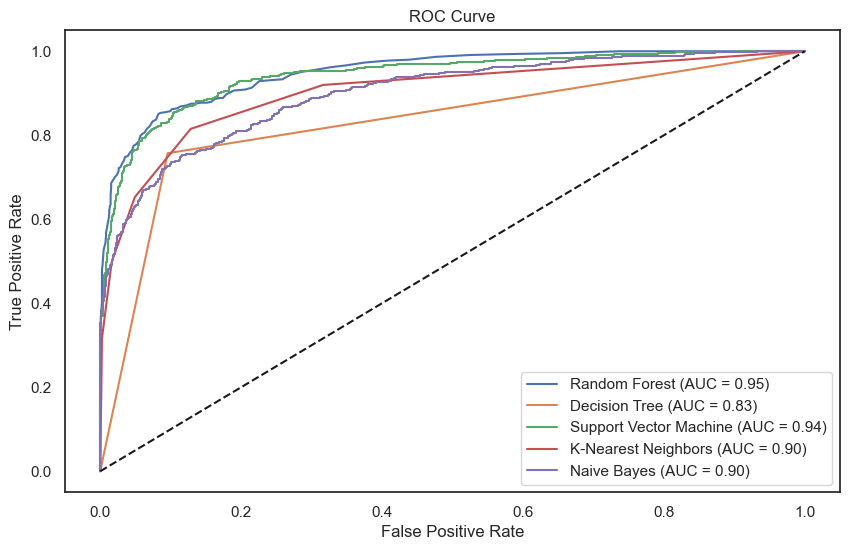

In [68]:
# Calculate ROC AUC and plot ROC curve for each model
models = [
    (model_rf, "Random Forest"),
    (model_dc, "Decision Tree"),
    (model_svm, "Support Vector Machine"),
    (model_knn, "K-Nearest Neighbors"),
    (model_nb, "Naive Bayes")
]

plt.figure(figsize=(10, 6))

for model, label in models:
    y_pred_proba = model.predict_proba(x_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

# Plot the diagonal line
plt.plot([0, 1], [0, 1], 'k--')

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# # Save the plot to a file
# plt.savefig('roc_curve.png')